## Prediction using Supervised Machine Learning
Predict the percentage of a student based on the number of study hours.

DATASET: http://bit.ly/w-data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Dataset imported successfully!")

Dataset imported successfully!


In [ ]:
dataset.head(10)    #printing first 10 dataset values

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


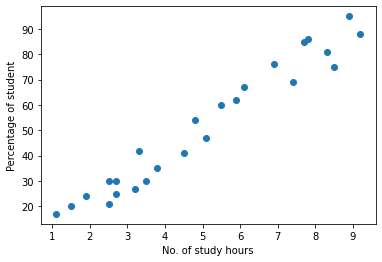

In [ ]:
#using matplotlib to plot the data in a graph
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.xlabel("No. of study hours")
plt.ylabel("Percentage of student")
plt.show()

In [ ]:
#splitting into training and testing data
A = dataset.iloc[:, :-1].values     #attributes
L = dataset.iloc[:, 1].values       #labels

from sklearn.model_selection import train_test_split
A_train, A_test, L_train, L_test = train_test_split(A, L, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regress = LinearRegression()
regress.fit(A_train, L_train)
print("Model Training Successful")

Model Training Successful


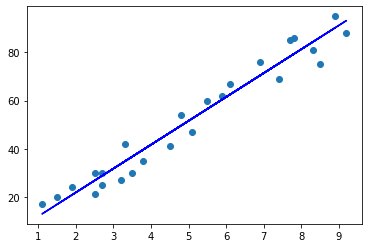

In [ ]:
line = regress.coef_*A+regress.intercept_
plt.scatter(A, L)
plt.plot(A, line, color = 'blue')
plt.show()

In [ ]:
print(A_test)
L_predict = regress.predict(A_test)
print(L_predict)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
dataset = pd.DataFrame({'Actual': L_test,'Predicted': L_predict})
dataset

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
#testing new data
dataset = np.array(9.25)
dataset = dataset.reshape(-1, 1)
pred = regress.predict(dataset)
if int(pred) > 100:
  print("The student scores 100%")
else:
  print("If the student studies for 9.25 hours per day, the percentage scored by him/her is {}.".format(pred)) 

If the student studies for 9.25 hours per day, the percentage scored by him/her is [93.69173249].


In [ ]:
#evaluating the model and calculating error aka checking the accuracy of the model
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(L_test, L_predict))

Mean Absolute Error: 4.183859899002982
